In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# for data visualizing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA : Preprocessing

In [2]:
#upload Datafile
from google.colab import files
uploaded = files.upload()

Saving abalone.csv to abalone.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['abalone.csv']))


In [5]:
# load the dataset
# data=pd.read_csv("abalone.CSV")
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
# row count and column count of the dataset
rows = data.shape[0]
columns =data.shape[1]
print(F"rows = {rows}, columns={columns}")

rows = 4177, columns=9


In [7]:
# check the data types
data.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
# check duplicates
print(data.duplicated().sum())

0


there are no duplicates

# Encoding



1.   **Encode numerical column `Rings` to categorical values**
2.   **Create 3 new Variables named `Age`, `weight_diff` and `Sex2`**

**Encoding scheme**
**`Rings` -> `Age_Category`**
* Young (1-5)
* Adult (6-13)
* Old (14-29)

**`Age` = 1.5 + `Rings`**

**`weight_diff` = `Whole Weight` - (`Shuck weight` + `Shell weight` + `Viscera weight`)**

**`Sex2` <-`Sex`**
* Male -> "Non-Infant"
* Female -> "Non-Infant"
* Infant -> "Infant"

In [9]:
# chaging age levels recategorization
data['Age_Category']=data['Rings']
young =list(range(1,6))
adult =list(range(6,14))
old = list(range(14,30))

data["Age_Category"]=data["Age_Category"].replace(young,"Young")
data['Age_Category']=data["Age_Category"].replace(adult,"Adult")
data['Age_Category']=data["Age_Category"].replace(old,"Old")

# changing Age_category to category
data['Age_Category']=data['Age_Category'].astype('category')

According to the paper in [Econometric Ways to Estimate the Age and Price of Abalone](https://mpra.ub.uni-muenchen.de/91210/1/MPRA_paper_91210.pdf) states that “the researchers believed adding 1.5 to the ring count is a reasonable approximation of the abalones age.”

Hence the abalone age is calculated by adding 1.5 to the count of rings

In [10]:
#adding a new variable age
age=data["Rings"]+1.5
data["Age"]=age
data.head(3)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_Category,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.15,15,Old,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.07,7,Adult,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.21,9,Adult,10.5


It was stated in the paper [Variation in the Relationship between Shell Length and
Meat Weight for Blacklip Abalone (Haliotis rubra, Leach,1814) with Implications for Compliance in New South
Wales, Australia ](https://www.asianfisheriessociety.org/publication/downloadfile.php?id=22&file=Y0dSbUx6QTJORFl3TXpnd01ERXpOVFUzT1RVeU5EY3VjR1Jt#:~:text=When%20the%20meat%20of%20abalone,1971%2C%20Gibson%20et%20al.) as “When the meat of abalone is removed from the shell and other viscera, the weight loss is increased as they bleed profusely through severed arteries, as there is no clotting agent in the haemolymph of abalone.” Hence can come up wi the below equation to calculate the Whole weight of an Abalone.

**Whole Weight = shuck weight + shell weight +viscera weight + weight loss due to bleeding/water**

Hence a new variable 'weight_diff' was introduced by subtracting the sum of 'Shuck Weight','Viscera Weight' and 'Shell Weight' from 'Whole Weight' (by using above Equation ) as an estimate of weight loss due to bleeding/water.

In [11]:
# create the weight_diff variable
diff = data['Whole weight']-(data['Shell weight']+data['Shucked weight']+data['Viscera weight'])
data['weight_diff'] = diff

In [12]:
# rename the variables with the long form
data["Sex"]=data["Sex"].replace('I',"Infant")
data["Sex"]=data["Sex"].replace('M',"Male")
data["Sex"]=data["Sex"].replace('F',"Female")


# for infant and non-infant descriptives create a new column(Sex2) by categorizing it as infant and non-infant categories
data["Sex2"]=data["Sex"] # create a copy
data["Sex2"]=data["Sex2"].replace('Male',"Non-Infant")
data["Sex2"]=data["Sex2"].replace('Female',"Non-Infant")


# Variable Descriptions

In [13]:
#Obtain Unique Values of each categorical variable
for col in data.columns:
    if data[col].dtype == "O": #select categorical variables
      print(col, ":", data[col].unique())
      print()

Sex : ['Male' 'Female' 'Infant']

Sex2 : ['Non-Infant' 'Infant']



In [14]:
#Obtain Statistics of the Numerical Variables
numeric_var = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight','Viscera weight', 'Shell weight', 'Rings', 'Age','weight_diff']
data[numeric_var].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,weight_diff
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684,0.049950
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169,0.058072
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000,-0.447500
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000,0.018000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000,0.037000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000,0.068000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000,0.608000


# Checking for outliers

In [15]:
#Using Inter Quartile Range(iqr)
#If a point which falls more than 1.5 times the iqr above the third quartile or below the first quartile its an outlier.

#calculating upper bound and lower bounds
def limits_cal(dataframe,col_name):
    q1 = dataframe[col_name].quantile(0.25)
    q3 = dataframe[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    return upper_bound,lower_bound

#checking for outliers
def outlier(dataframe,col_name):
  upper,low=limits_cal(dataframe,col_name)
  max=dataframe[col_name].max()
  min=dataframe[col_name].min()
  for i in range(len(max)):
    if (max[i] > upper[i]) | (min[i] < low[i]):
      print('outlier')
    else:
      print('no outlier')

#call function
outlier(data,numeric_var)

outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier
outlier


From the Above it seems all of the variables have outliers.
Visualize them using boxplots

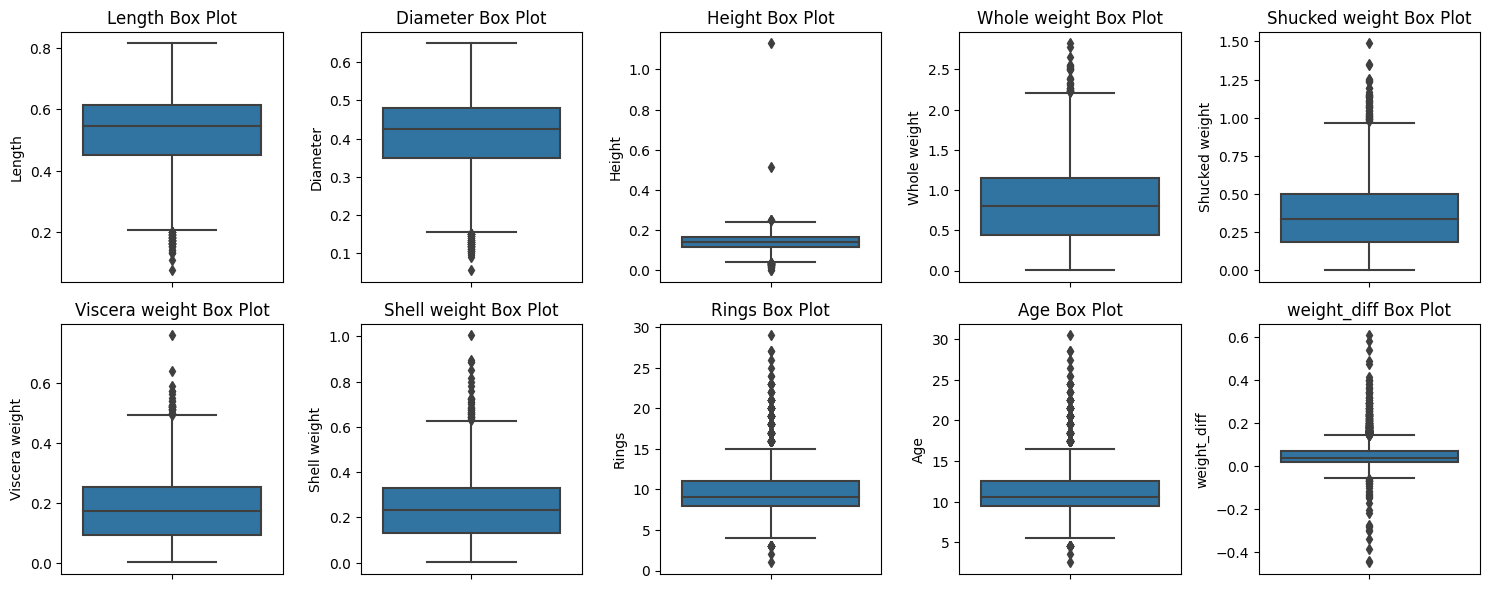

In [16]:
#create box plots for each demographic feature
def graph(ax, var):
    sns.boxplot(y=var, data=data, ax=ax)
    ax.set_title(f'{var} Box Plot')

# Create a 2x5 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

# Create box plots
for i, var in enumerate(numeric_var):
    graph(axes[i], var)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

out of all except for height variable, the rest of the boxplots have a lot of outliers. Hence removing them will cause a huge data loss. however studying the height variable, it has only two hence its possible to remove it. but need to check first if its feasible.

In [17]:
# create  a function to get row outlier id for a given variable
def get_outlier_row(col_name):
  outlier_rows=[]
  upper,low=limits_cal(data,col_name)
  column=data[col_name]

  for i in range(len(column)):
    if (column[i] > upper) | (column[i] < low):
      outlier_rows.append(data.index[i])

  return outlier_rows

#for humidity
height_rows=get_outlier_row("Height")

data.loc[height_rows]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_Category,Age,weight_diff,Sex2
236,Infant,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,Young,2.5,-0.0010,Infant
237,Infant,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3,Young,4.5,0.0015,Infant
238,Infant,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3,Young,4.5,0.0005,Infant
239,Infant,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5,Young,6.5,0.0040,Infant
306,Infant,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3,Young,4.5,0.0045,Infant
694,Infant,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4,Young,5.5,0.0050,Infant
718,Infant,0.180,0.125,0.035,0.0265,0.0095,0.0055,0.0085,4,Young,5.5,0.0030,Infant
719,Infant,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,Young,3.5,0.0015,Infant
720,Infant,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3,Young,4.5,0.0010,Infant
1174,Female,0.635,0.495,0.015,1.1565,0.5115,0.3080,0.2885,9,Adult,10.5,0.0485,Non-Infant


from the above it is abnormal for an abalone to have height as 0.515 and 1.13 as the largest height recorded was smaller than that. hence only these two records will be removed.

In [18]:
#Remove rows with the specified row IDs from the DataFrame
data = data.drop([1417,2051], axis=0)

# Reset the index after removing rows
data = data.reset_index(drop=True)

#check if the rows are removed
print(data.shape)

(4175, 13)


# Checking for missing values

In [19]:
#missing values
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age_Category      0
Age               0
weight_diff       0
Sex2              0
dtype: int64

In [20]:
#check for zeros
data.isin([0]).sum()

Sex               0
Length            0
Diameter          0
Height            2
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
Age_Category      0
Age               0
weight_diff       5
Sex2              0
dtype: int64

the weight difference can be zero but not the height.

In [21]:
#get records of heights with zero values
data[data['Height'] == 0]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_Category,Age,weight_diff,Sex2
1257,Infant,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,Adult,9.5,0.0205,Infant
3994,Infant,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,Adult,7.5,-0.3025,Infant


Since there are only 2 missing values, these two rows can be omitted since it won't affect the dataset in a large scale

In [22]:
#remove data and check
data = data.drop([1257,3994])
data[data['Height'] == 0] # check if its been removed

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age_Category,Age,weight_diff,Sex2


In [23]:
 # Split data set to testing and training
 train, test =train_test_split(data, train_size = 0.8, random_state = 1234)

In [24]:
# to use for model training save the cleaned dataset.
# saving data
data.to_csv('cleaned_abalone.csv', index=False)

from google.colab import files
files.download('cleaned_abalone.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptive Analysis

### I) Univariate Analysis

In [ ]:
# get descriptives
train[numeric_var].describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,weight_diff
count,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000,3338.000000
mean,0.522816,0.407051,0.138953,0.825029,0.357512,0.179439,0.237935,9.917316,11.417316,0.050143
std,0.120530,0.099535,0.038631,0.489117,0.219848,0.109063,0.139786,3.227893,3.227893,0.059218
min,0.075000,0.055000,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000,-0.447500
25%,0.450000,0.345000,0.110000,0.435625,0.181500,0.092000,0.126000,8.000000,9.500000,0.017500
50%,0.545000,0.425000,0.140000,0.796000,0.336000,0.169750,0.230000,9.000000,10.500000,0.036500
75%,0.615000,0.480000,0.165000,1.155625,0.503000,0.252000,0.327375,11.000000,12.500000,0.068000
max,0.815000,0.650000,0.250000,2.548000,1.253000,0.590000,1.005000,29.000000,30.500000,0.608000


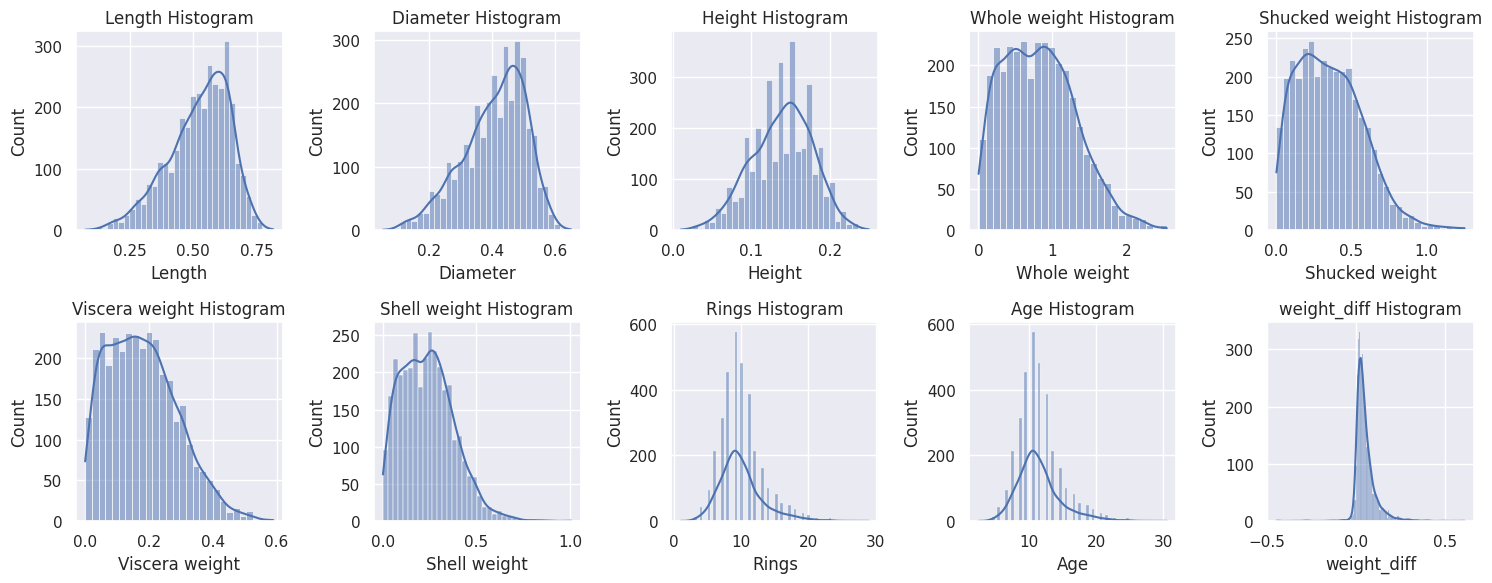

In [ ]:
# create the histograms for better visualization of the distributions

def graph(ax, var):
    sns.histplot(train[var], ax=ax, kde=True)
    ax.set_title(f'{var} Histogram')

# Create a 2x5 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

# Iterate through variables and create histograms
for i, var in enumerate(numeric_var):
    graph(axes[i], var)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

As seen above many variables are showing skewed distributions. hence its better to keep in mind to standardize the values when fitting models.

### II) Response variable – Age_Category and Age

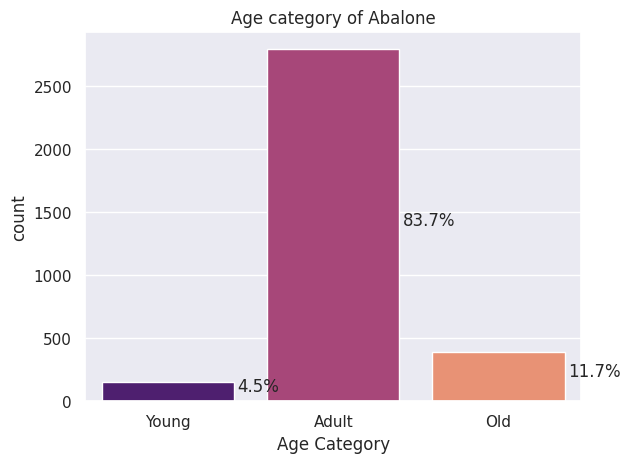

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

ax=sns.countplot(x="Age_Category",data=train,palette="magma",order=["Young","Adult","Old"])
plt.title("Age category of Abalone")
plt.xlabel("Age Category")
tot=len(train["Age_Category"])
for p in ax.patches:
    percentage='{:.1f}%'.format(100*p.get_height()/tot)
    x=p.get_x()+p.get_width()+0.02
    y=p.get_y()+p.get_height()/2
    ax.annotate(percentage,(x,y))

A new variable Age _Category is created from re-categorization of the Rings variable which consisted of discrete values from 1-29.

It was re-categorized as:
1)1-5 = Young 2) 6-13 = Adult 3)14-29 = Old


The majority of the Abalones were the Adults. Since the age of the abalone can be approximated by adding 1.5 years to the ring count of the abalone shell'Age'variable was introduced in order to define the true age of the abalone in years.

### III) Physical measures related to size

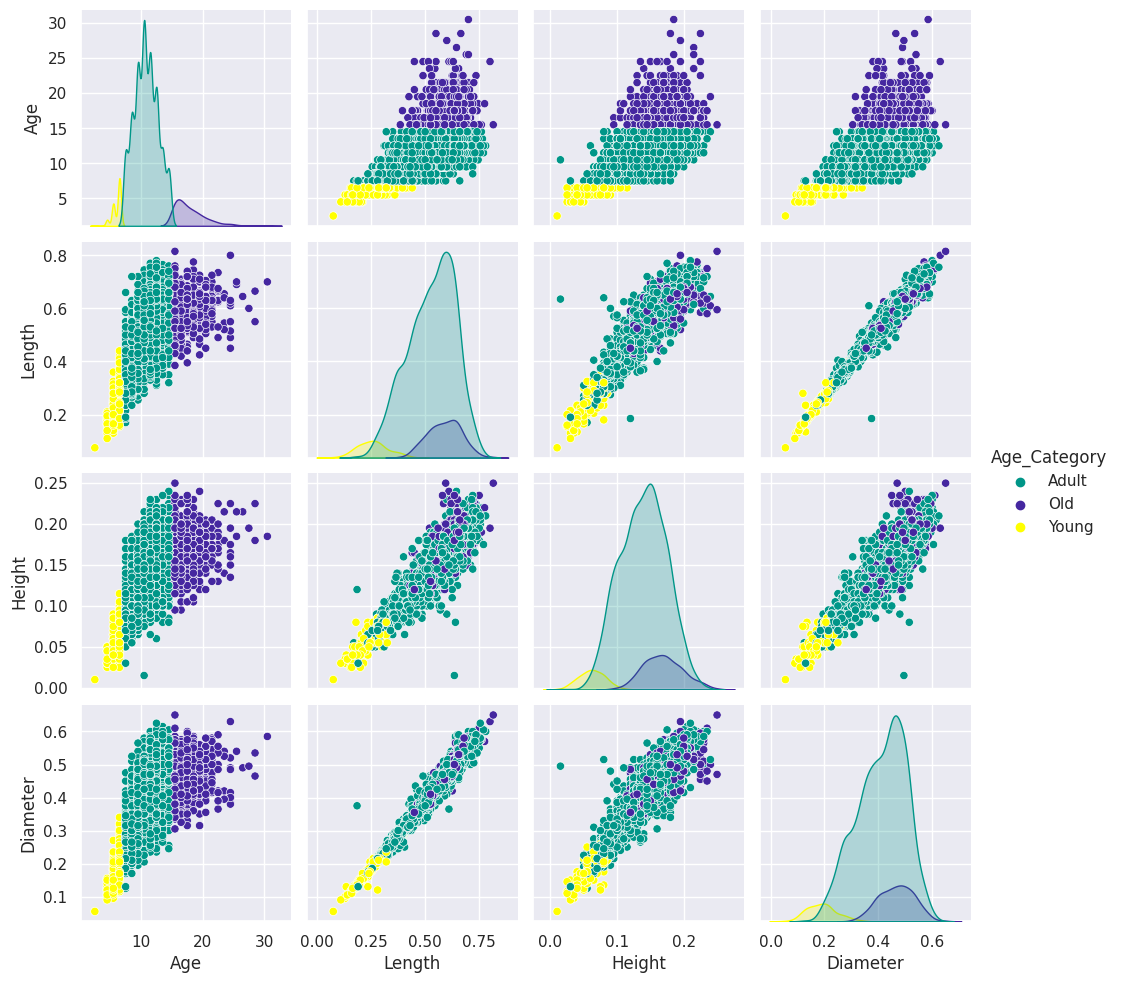

In [ ]:
data_new= train[['Age','Length', 'Height','Diameter',"Age_Category",]]
sns.pairplot(data_new, hue="Age_Category", palette=["#009688","#4527A0","#FFFF00"])

The variables Length, Height and Diameter of the abalone was considered. Majority of the size measures of the abalone was within the average standard sizes of abalones. However, the inter relationships between these variables showed positive collinearity (in the corrrelation plot below).

The results  can be explained by the allometry of the Abalone. This behavior
exhibited by the Length Diameter and Height Diameter is called as isometric
growth. According to the [definition](https://www.genscript.com/biology-glossary/search?special=isometric+growth), isometric growth is the “growth that occurs at the same rate for all parts of an organism so that its shape is consistent throughout development.”


When considering the relationship of these variables with the age, the  increment of the size of the abalone (the growth rate) reduces (shows a non linear pattern) after a certain period of time. These results are proven true as [link 1](https://www.fao.org/3/AB731E/AB731E01.htm#chp1I),[link 2](https://www.globalseafood.org/advocate/red-abalone-morphology/) states that the growth rate is reduced when the maturity is reached.

### IV ) Infant s and Non Infant Genders

Sex           Female  Infant  Male
Age_Category                      
Adult            871     914  1010
Old              175      41   176
Young              4     129    18


Text(0, 0.5, 'Propotion')

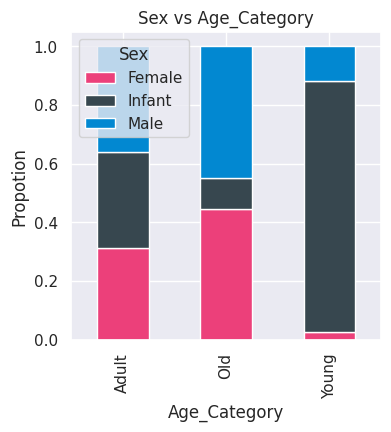

In [ ]:
print(pd.crosstab(train["Age_Category"],train["Sex"]))
Credit=pd.crosstab(train["Age_Category"],train["Sex"])
Credit.div(Credit.sum(1).astype(float),axis=0).plot.bar(stacked=True,figsize=(4,4),color=["#EC407A","#37474F","#0288d1"])
plt.title("Sex vs Age_Category")
plt.ylabel("Propotion")

Sex is defined when “ Abalone were considered to be sexually differentiated if gonad (either testis or ovary) could be discerned.” By studying the
relationships, it was found that majority of the young abalones
are considered to be infants because according to [link 1](https://www.fao.org/3/AB731E/AB731E01.htm#chp1I) “the gonad tissue can be visible when the shell reaches about 30 mm in length, usually after one year.” Hence, sex
determination is difficult when abalones are young. But infant abalones consisted of old and adult abalones too.

Text(0.5, 1.0, 'Relationship between Length and Age Category with Sex of abalone')

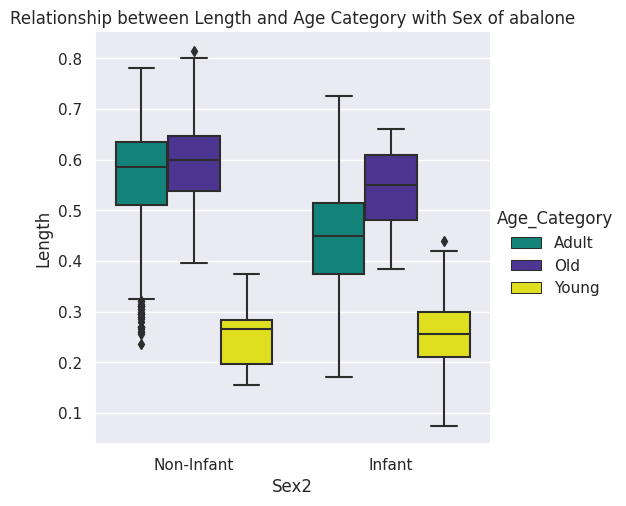

In [ ]:
sns.catplot(x="Sex2",y="Length",kind="box",data=train,hue="Age_Category",palette=["#009688","#4527A0","#FFFF00"])
plt.title("Relationship between Length and Age Category with Sex of abalone")

According to the results observed by the Non Infant abalones tend to have high medians for length measures compared to Infants . The reason was because Infant gender abalones do not follow growth rates similar to an average abalone. They are under developed. Which is why even though they age, their sex could not be discerned as the gonad tissue fail to develop properly. Hence it is not an issue for abalone of any age to be categorized into Infant gender instead of male or female (Non Infant).

### V) Physical measures related to weight

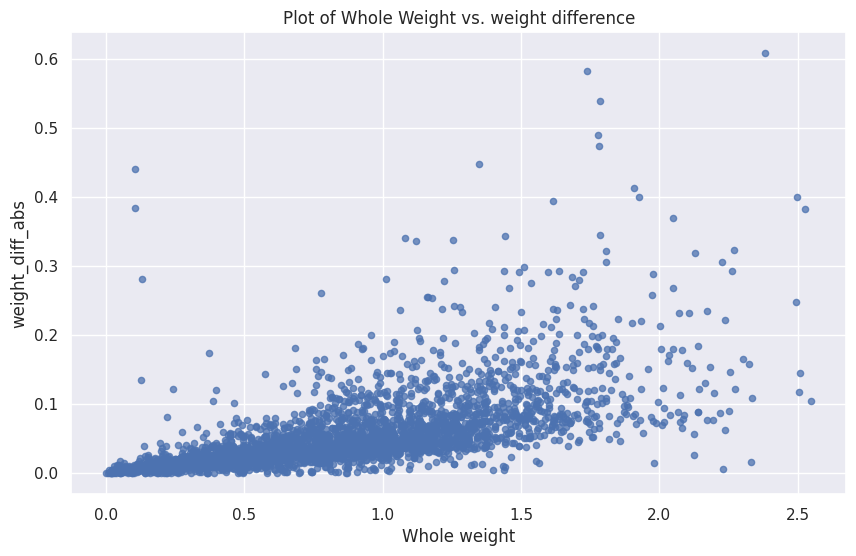

In [ ]:
# Calculate the absolute values of the 'weight_diff' column
train['weight_diff_abs'] = train['weight_diff'].abs()

# Plot the scatter plot
train.plot.scatter("Whole weight","weight_diff_abs", figsize=(10, 6),
                   title="Plot of Whole Weight vs. weight difference", alpha=0.75)
plt.show()
plt.close()


Text(0.5, 1.0, 'Relationship between Age_Category and Whole weight')

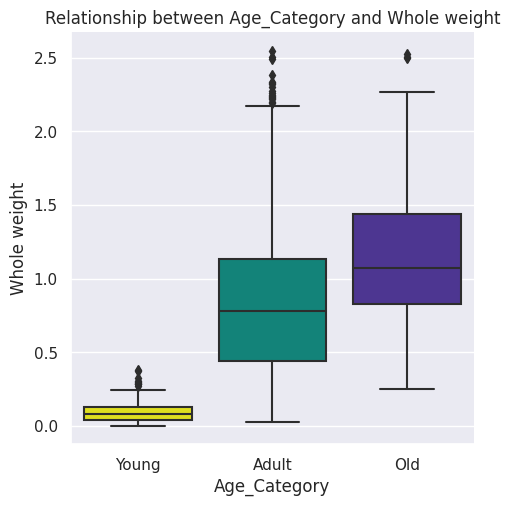

In [ ]:
# boxplot
sns.catplot(x="Age_Category",y="Whole weight",kind="box",data=train,palette=["#FFFF00","#009688","#4527A0"],order=['Young','Adult','Old'])
plt.title("Relationship between Age_Category and Whole weight")

Text(24.683805555555566, 0.5, 'Density')

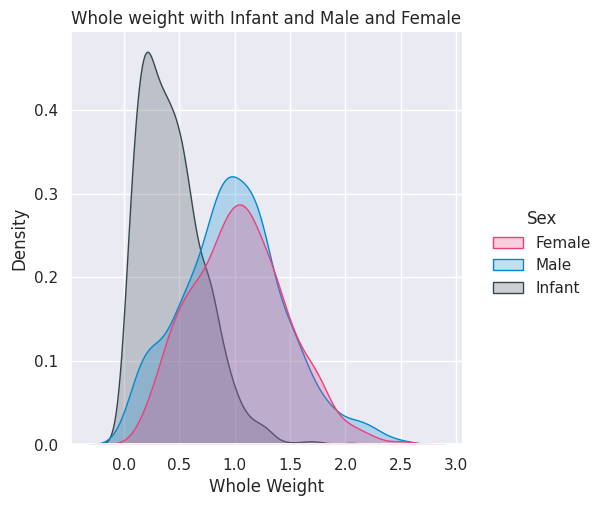

In [ ]:
# distribution/density plot
sns.displot(train, kind="kde", x="Whole weight",hue="Sex",palette=["#EC407A","#0288d1","#37474F"],fill=True)
plt.title("Whole weight with Infant and Male and Female")
plt.xlabel("Whole Weight")
plt.ylabel("Density")

According to Scatter plot the weight loss due to bleeding /water is increases with the weight . Whole weight is dependent on age (box plot), as older abalones tend to have a high Whole Weights . Which is why the old abalones are expensive as they contain a lot of meat . Similar to the previous situation, Infant distribution of weights is significantly different from
the males and females (distribution-density plot)

### VI ) Weight and Length Relationship

<Axes: xlabel='Length', ylabel='Whole weight'>

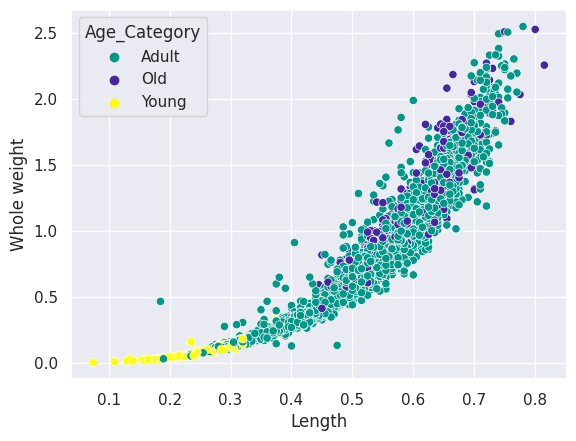

In [ ]:
sns.scatterplot(y="Whole weight", x="Length",
                data=train, hue="Age_Category",palette=["#009688","#4527A0","#FFFF00"])

Whole weight and length of abalones display allometric growth definition: phenomenon whereby parts of the same organism grow at different rates [link 3](https://www.genscript.com/) according to the above figure. These results are supported by the findings of *(Gibson and Worthington, 2012; Najmudeen, 2015)* and it adheres to the specifications mentioned in [link 1](https://www.fao.org/3/AB731E/AB731E01.htm#chp1I) where it states that, “The weight increases faster than the growth of shell. For example, if the length of the shell doubles, the weight increases eight fold.” It's clear that older abalones have high weights and lengths.

### VII) Significant Attributes in Age determination

In [ ]:
# select abalones for the old age category
df_old=train[train['Age_Category'] == "Old"]
df_old.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,weight_diff,weight_diff_abs
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,0.589094,0.466901,0.168559,1.143186,0.432676,0.239861,0.364364,16.448980,17.948980,0.106286,0.106599
std,0.076143,0.063566,0.029144,0.431569,0.177620,0.094598,0.143928,2.569235,2.569235,0.074124,0.073671
min,0.385000,0.305000,0.095000,0.252000,0.091500,0.055000,0.090000,14.000000,15.500000,-0.025000,0.002500
25%,0.530000,0.420000,0.145000,0.826875,0.301750,0.168875,0.260000,14.000000,15.500000,0.055000,0.055000
50%,0.592500,0.470000,0.165000,1.073250,0.412250,0.225000,0.345000,16.000000,17.500000,0.087750,0.087750
75%,0.645000,0.515000,0.190000,1.437375,0.545250,0.303125,0.441625,18.000000,19.500000,0.140500,0.140500
max,0.815000,0.650000,0.250000,2.526000,1.239500,0.590000,1.005000,29.000000,30.500000,0.490000,0.490000


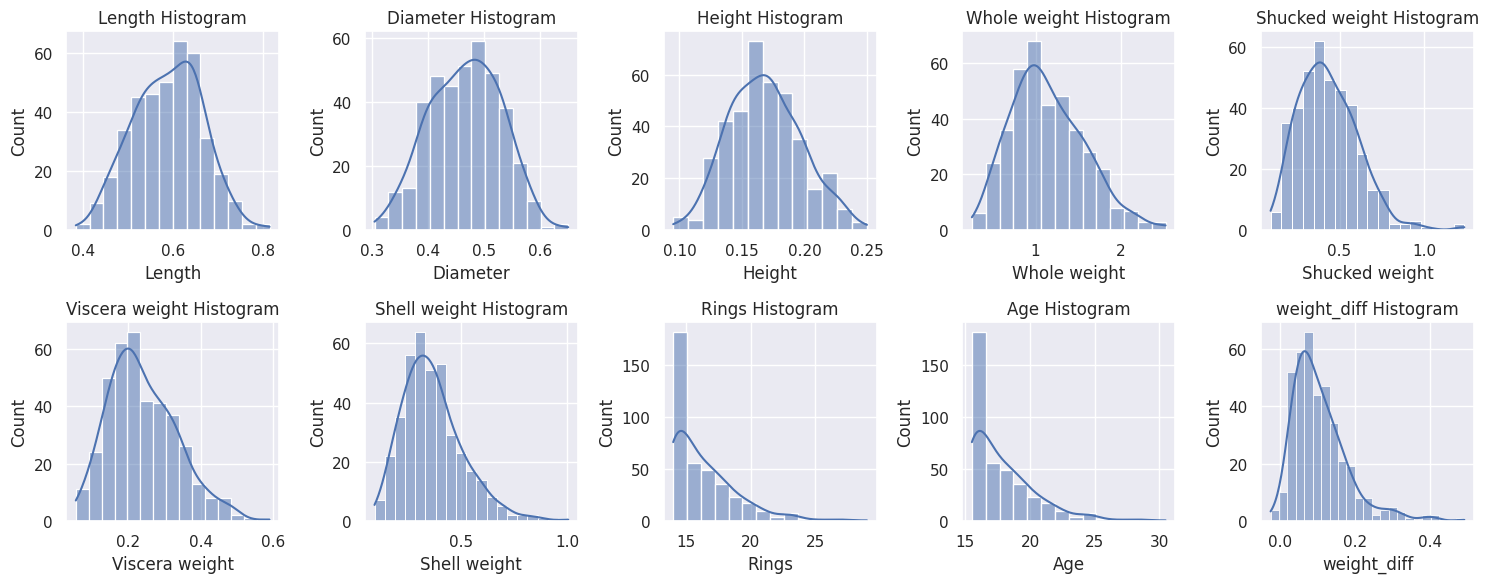

In [ ]:
def graph(ax, var):
    sns.histplot(df_old[var], ax=ax, kde=True)
    ax.set_title(f'{var} Histogram')

# Create a 2x5 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))
axes = axes.flatten()

# Iterate through variables and create histograms
for i, var in enumerate(numeric_var):
    graph(axes[i], var)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Buyers and sellers are interested in
determining abalones that are of high price. **(Hossain, Md. Mobarak Chowdhury,
2019)** “The economic value of abalone is positively correlated with its age” hence identification of the features that help determine old abalones are of more importance.
Hence the results can be summarized as follows.
For old abalones,

**Physical Property**       |  **Range**
* Whole Weight              |  0.8-1.48(hg)
* Height                    |  0.15-0.18(dm)
* Diameter                  |  0.42-0.51(dm)
* Length                    |  0.55-0.64(dm)  



### VIII) Multicollinearity among variables

<ipython-input-147-0b0bf80d51d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mydata.corr()


<Axes: >

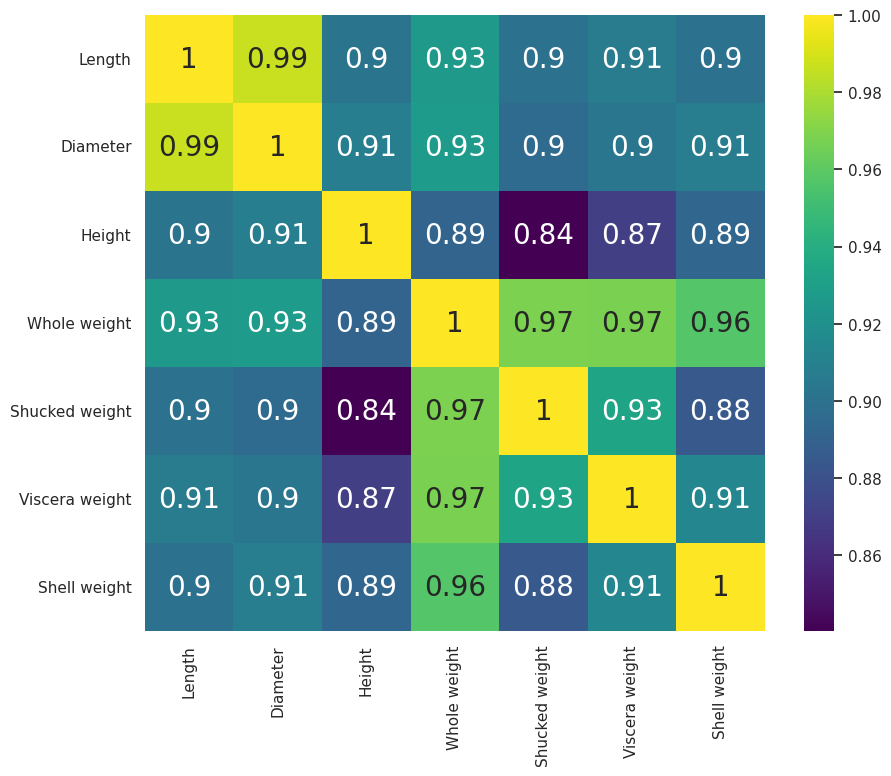

In [ ]:
mydata=train.drop(["Age","Rings","weight_diff","Sex2","weight_diff_abs"],axis=1)
corr = mydata.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap=sns.color_palette("viridis",as_cmap=True),annot_kws={"size":20})

High collinearity exists among all numerical attributes. Among them Shucked weight and Height have the lowest collinearity of 0.84. Hence shrinkage methods are required to minimize the effect caused by multicollinearity.